# RandomForests and AdaBoost

## 1. 算法测试

In [149]:

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 加载数据集
data = load_iris()
X = data.data
X = X[:, 0:2]
y = data.target

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建Random Forests模型
rf_model = RandomForestClassifier(n_estimators=8, random_state=42, max_depth=3)
rf_model.fit(X_train, y_train)

# 预测
y_pred = rf_model.predict(X_test)

# 评估性能
accuracy = accuracy_score(y_test, y_pred)
print("Random Forests准确率：", accuracy)


Random Forests准确率： 0.8666666666666667


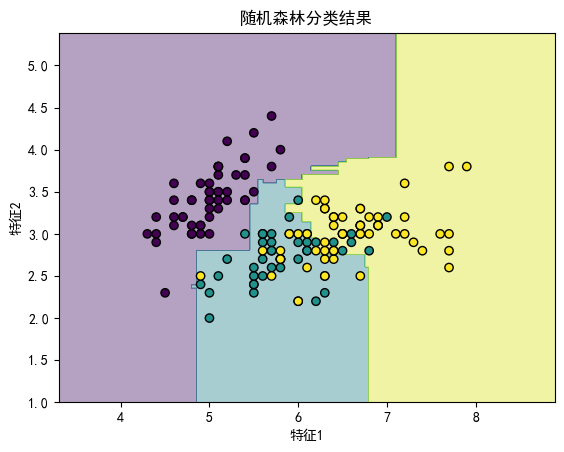

In [132]:
# 绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy= np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('随机森林分类结果')
plt.show()

In [146]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# 创建AdaBoost模型
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=80)
adaboost_model.fit(X_train, y_train)

# 预测
y_pred_adaboost = adaboost_model.predict(X_test)

# 评估性能
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost准确率：", accuracy_adaboost)


AdaBoost准确率： 0.8


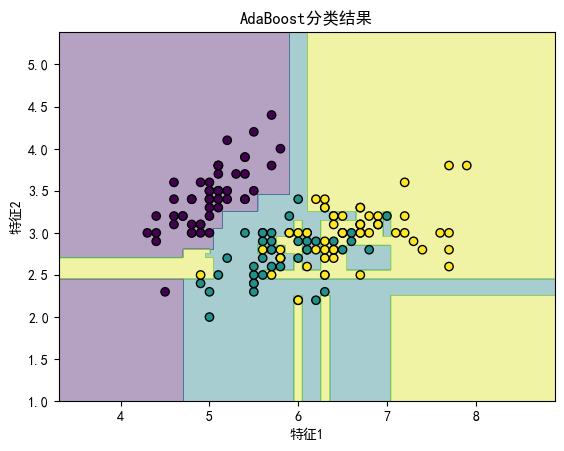

In [134]:
# 绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = adaboost_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('AdaBoost分类结果')
plt.show()

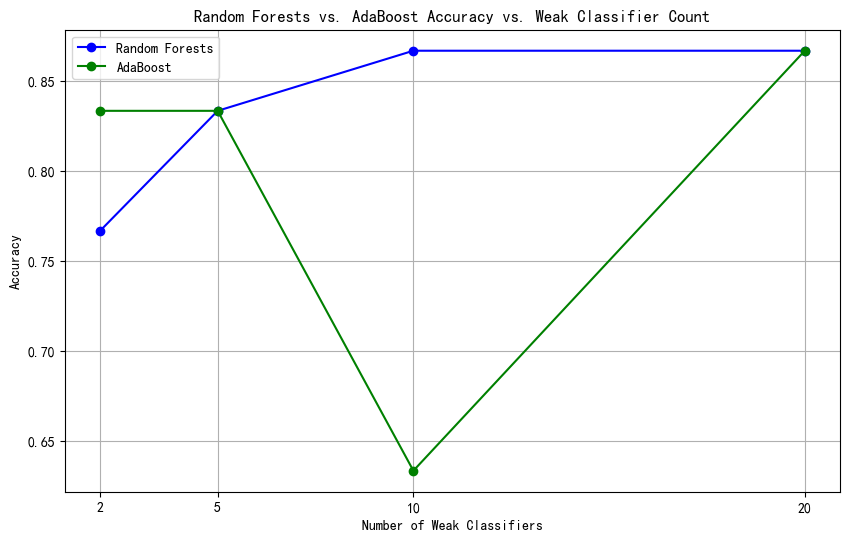

In [130]:
import matplotlib.pyplot as plt

# 弱分类器数量
weak_classifier_counts = [2, 5, 10, 20]

# Random Forests的准确率
random_forests_accuracy = [0.7667, 0.8333, 0.8667, 0.8667]

# AdaBoost的准确率
adaboost_accuracy = [0.8333, 0.8333, 0.6333, 0.8667]

# 创建对比折线图
plt.figure(figsize=(10, 6))
plt.plot(weak_classifier_counts, random_forests_accuracy, marker='o', label='Random Forests', linestyle='-', color='blue')
plt.plot(weak_classifier_counts, adaboost_accuracy, marker='o', label='AdaBoost', linestyle='-', color='green')
plt.title('Random Forests vs. AdaBoost Accuracy vs. Weak Classifier Count')
plt.xlabel('Number of Weak Classifiers')
plt.ylabel('Accuracy')
plt.xticks(weak_classifier_counts)  # 仅显示指定的横坐标值
plt.legend()
plt.grid(True)
plt.show()

